<a href="https://colab.research.google.com/github/anirbanghoshsbi/.github.io/blob/master/work/nifty_seasonality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yfinance --q

[*********************100%%**********************]  1 of 1 completed


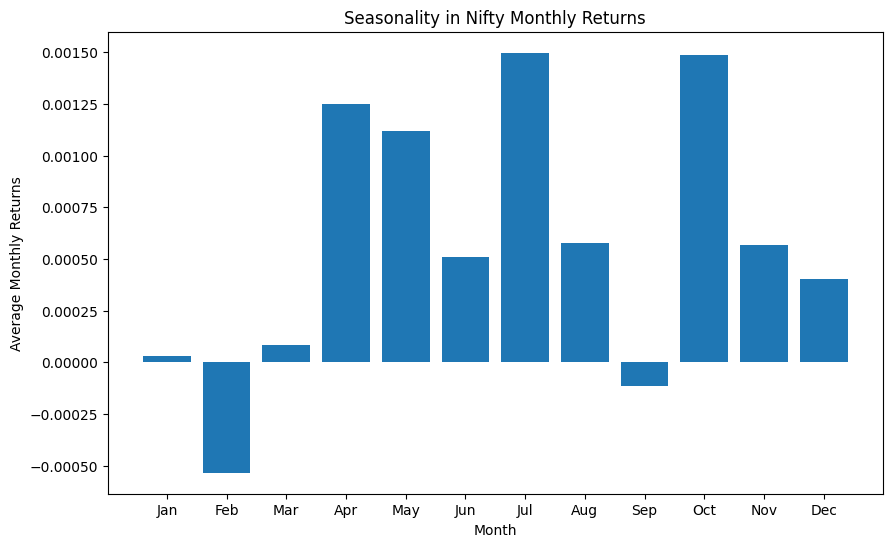

In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define the ticker symbol for Nifty (Nifty 50 index)
nifty_ticker = "^NSEI"

# Define the date range for the last 10 years
start_date = "2013-08-23"
end_date = "2023-08-23"

# Fetch Nifty data from Yahoo Finance
nifty_data = yf.download(nifty_ticker, start=start_date, end=end_date)

# Calculate monthly returns
nifty_data["Monthly_Returns"] = nifty_data["Adj Close"].pct_change()

# Extract month and year from the index
nifty_data["Year"] = nifty_data.index.year
nifty_data["Month"] = nifty_data.index.month

# Calculate average returns for each month
average_monthly_returns = nifty_data.groupby("Month")["Monthly_Returns"].mean()

# Create a list of month names for labeling the plot
month_names = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

# Plot the seasonality using a bar plot
plt.figure(figsize=(10, 6))
plt.bar(average_monthly_returns.index, average_monthly_returns.values, tick_label=month_names)
plt.xlabel("Month")
plt.ylabel("Average Monthly Returns")
plt.title("Seasonality in Nifty Monthly Returns")
plt.show()


[*********************100%%**********************]  1 of 1 completed


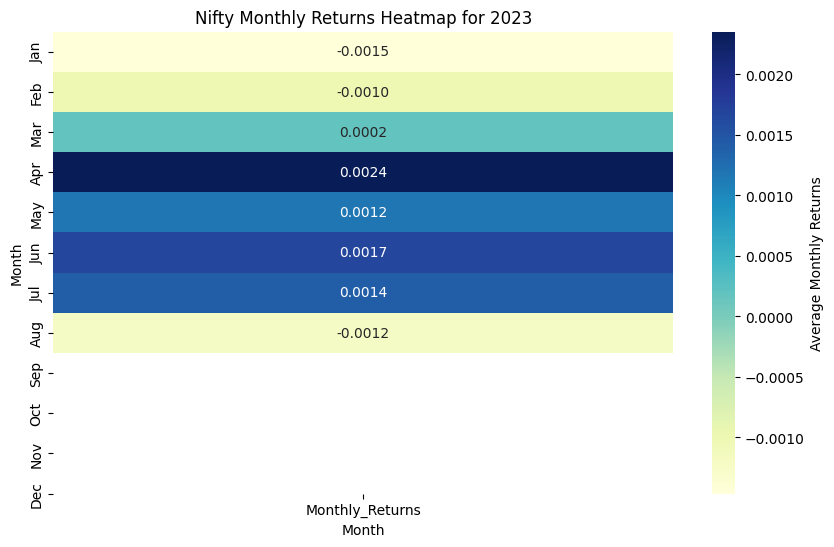

In [7]:

# Define the ticker symbol for Nifty (Nifty 50 index)
nifty_ticker = "^NSEI"

# Get the current year
current_year = pd.Timestamp.now().year

# Define the date range for the current year starting from January
start_date_current_year = f"{current_year}-01-01"
end_date_current = pd.Timestamp.now()

# Fetch Nifty data for the current year from January to now
nifty_data_current_year = yf.download(nifty_ticker, start=start_date_current_year, end=end_date_current)

# Calculate monthly returns for the current year
nifty_data_current_year["Monthly_Returns"] = nifty_data_current_year["Adj Close"].pct_change()

# Extract month from the index
nifty_data_current_year["Month"] = nifty_data_current_year.index.month

# Calculate average monthly returns for each month of the current year
average_monthly_returns_current_year = nifty_data_current_year.groupby("Month")["Monthly_Returns"].mean().reset_index()

# Pivot the data for heatmap plotting
heatmap_data = average_monthly_returns_current_year.pivot_table(index="Month", values="Monthly_Returns", aggfunc="mean")

# Create a list of month names for labeling the plot
month_names = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

# Plotting the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=True, fmt=".4f", yticklabels=month_names, cbar_kws={"label": "Average Monthly Returns"})
plt.xlabel("Month")
plt.ylabel("Month")
plt.title(f"Nifty Monthly Returns Heatmap for {current_year}")
plt.show()
